<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 5B </h1>
<h2> Regression </h2> 
<h3> Lesson Outline </h3>


- 1. [Simple Linear Regression](#1)
    - 1.1 [Example - Tips](#1.1)
    - 1.2 [Example - Housing Prices](#1.2)
    - [Practice I](#P1)
- 2. [Multivariate Linear Regression](#2)
    - 2.1 [Example - Housing Prices](#2.1)
    - [Practice II](#P2)

In [1]:
!pip install sklearn

<hr/>

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Scikit Learn - SKLearn </font> </h2></a>

<a id='1.1'><h3>5 Standard Steps</h3></a>

**Step 1**: Choose a class of machine learning model from the library 

**Step 2**: Choose the model’s hyperparameters by instantiating with desired values (tuning)

**Step 3**: Arrange data into features and target

**Step 4**: Fit model to your data by using the fit() method of the model 

**Step 5**: Apply the model to new data:
    - For supervised learning, using the predict() method
    - For unsupervised learning, using the predict() or transform() method


<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Simple Linear Regression </font> </h2></a>

<a id='1.1'><h3>1.1 Example - Tips </h3></a>



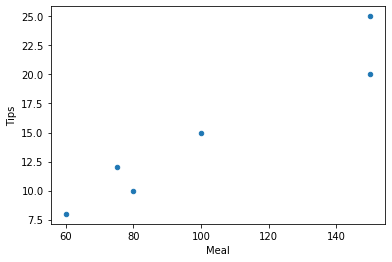

In [4]:
import pandas as pd

data = { 
    'ID': [1,2,3,4,5,6],
    'Tips': [10, 25, 12, 8, 15, 20],
    'Meal': [80, 150, 75, 60, 100, 150]
}

tips_df = pd.DataFrame(data)
tips_df

tips_df.plot(kind='scatter',
            x='Meal',
            y='Tips')

In [7]:
from sklearn import datasets, linear_model

# Step 1 & 2
regression = linear_model.LinearRegression()

# Step 3
X = tips_df[['Meal']]
Y = tips_df[['Tips']]

# Step 4
regression.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step 5 is in another cell because the model has been trained, there is not need to keep re-training the model again and again.

In [8]:
# Step 5 
# Predicting Meal of $10 
 # < Note that it's a list of lists
regression.predict([[100]])

array([[14.6029654]])

Use `.coef_` and `.intercept_` to get the coefficent and intercept of the regression.

In [9]:
print(regression.coef_)
print(regression.intercept_)

#  Tips = -1.27  + 0.158 (Meal)
# With every $1 increase in meal, tips would increase by $0.15

[[0.15881384]]
[-1.27841845]


<a id='1.2'><h3>1.2 Example - Housing Prices </h3></a>

Filter to just two columns, where the predictor variable is `sqft_living` and the target variable `price`.  

      sqft_living  sqm_living  floors
0            3500      106.71     2.0
1            1180       35.98     1.0
2            1260       38.41     1.5
3            1520       46.34     1.0
4            1780       54.27     1.0
...           ...         ...     ...
4995         4090      124.70     2.0
4996         1820       55.49     1.0
4997         4270      130.18     2.0
4998         1710       52.13     1.0
4999         1490       45.43     1.0

[5000 rows x 3 columns]
        price
0      788600
1      600000
2      523000
3      415000
4      535000
...       ...
4995  1680000
4996   345000
4997  1300000
4998   480000
4999   269000

[5000 rows x 1 columns]


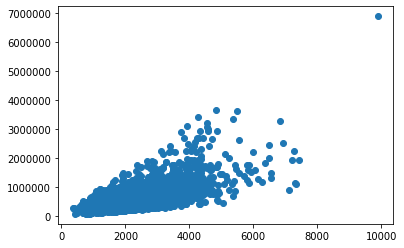

In [11]:
housing_x = pd.read_csv('housing_x.csv')
price = pd.read_csv('housing_y.csv')

print(housing_x)
print(price)
import matplotlib.pyplot as plt

plt.scatter(housing_x['sqft_living'], price)

### Train Test Split

Filter to just to the `RunTime` and `Performance` as a DataFrame, `rt_perf_df`. Conduct `train_test_split()` to get the four splits of data. 

In [12]:
from sklearn.model_selection import train_test_split

sqft_living = housing_x[['sqft_living']]

#pseudo-randomness. we set random_state=20 because we want to achieve the same outcome as the TA. random_state is similar to the seed of random
X_train, X_test, Y_train, Y_test = train_test_split(sqft_living, price, random_state=20)



### Fit Model

Using the train datasets, train the model as `simple_housing_lr`.

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [14]:
print(regression.coef_)
print(regression.intercept_)

#price = -40567.95066026 + (278.71655879 sqrt_living)
#For every increase in sqrt_living, the price increase by 278

[[278.71655879]]
[-40567.95066026]


### Predict 

Using `.predict()`, predict with a custom square-feet.

In [15]:
custom_sqft = 10000

regression.predict([[custom_sqft]])


array([[2746597.63726424]])

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

fitted_values = regression.predict(X_test)

print(r2_score(Y_test, fitted_values))
print(mean_absolute_error(Y_test, fitted_values))
print(mean_squared_error(Y_test, fitted_values))

0.46457407510643134
163898.81206966777
53899675727.63344


<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font></h2></a>

### Fitness Dataset

Based on this fitness dataset, predict the `RunTime` based on the following predictors:

1. Performance

### Read  Dataset

Read the `fitness-data.csv` as `fit_df`. 

### Train Test Split

Filter to just to the `RunTime` and `Performance` as a DataFrame, `rt_perf_df`. Conduct `train_test_split()` to get the four splits of data. 

### Fit Model

Create a LinearRegression variable, named  `simple_performance_lr`. Using the trained datasets, train the model.

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

### Predict 

Using `.predict()`, predict with custom values. 

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.


<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Multivariate Linear Regression </font> </h2></a>

<a id='2.1'><h3>2.1 Example - Housing Prices  </h3></a>

This time, we'll apply more variables to the model and drop variables where necessary.

In [19]:
# Read from CSV the following files: KX_train, KX_test, Ky_train, Ky_test
x_all = pd.read_csv('housing_x.csv')
y_all = pd.read_csv('housing_y.csv')
display(x_all.head())
display(y_all.head())

,sqft_living,sqm_living,floors
0,3500,106.71,2.0
1,1180,35.98,1.0
2,1260,38.41,1.5
3,1520,46.34,1.0
4,1780,54.27,1.0


,price
0,788600
1,600000
2,523000
3,415000
4,535000


### Feature Selection

Detect for multicollinearity and drop variables where necessary by using `.corr()`.

In [20]:
x_all.corr()

,sqft_living,sqm_living,floors
sqft_living,1.000000,1.000000,0.348178
sqm_living,1.000000,1.000000,0.348179
floors,0.348178,0.348179,1.000000


### Train Test Split

Drop and filter to the valid predictors in the model as a DataFrame, `housing_df`. Conduct `train_test_split()` to get the four splits of data. 

In [21]:
from sklearn.model_selection import train_test_split
# Since either SQFT or SQM are highly correlated, drop either one

housing_x = x_all[['sqft_living', 'floors']]

X_train, X_test, y_train, y_test = train_test_split(housing_x, y_all, random_state=42)

### Fit Model

Create a LinearRegression variable, `multi_housing_lr`. With the train dataframes, use `.fit()` to train the model.

In [22]:
from sklearn import linear_model

regression = linear_model.LinearRegression()

regression.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [23]:
print(regression.coef_)
print(regression.intercept_)

# Housing Price = -48237.317 + 274 (SQFT_Living) + 12566.866 (Floors)

[[  274.0203467  12566.86687756]]
[-48237.31783364]


### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [26]:
from sklearn.metrics import r2_score 

fitted_values = regression.predict(X_test)
print("r2_score", r2_score(y_test, fitted_values))

r2_score 0.4947420580577476


<a id='P2'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice II </font><font color="skyblue"> * </font></h2></a>

### Fitness Dataset

Based on this fitness dataset, predict the `RunTime` based on the following predictors:

1. Age
2. Weight
3. Oxygen_Consumption
4. Run_Pulse
5. Rest_Pulse
6. Maximum_Pulse
7. Performance

### Read 

### Feature Selection

With the variables above, detect for multicollinearity and drop variables where necessary by using `.corr()`.

### Train Test Split

Based on the correlation matrix, fliter for the __valid__ predictor variables and do `train_test_split` with the target variable `RunTime`. 

### Fit Model

Using the train dataframes, create a LinearRegression variable called `multi_runtime_lr`. Use `.fit()`, train the model.

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.